## Test for Bikerider Detector
You need tensorflow object detectection API
* https://github.com/tensorflow/models/tree/master/research/object_detection

download trained network from Box and unzip it under ../data/training/model
* https://umich.box.com/s/ncqywd2d8nfahzt1nmz6e2218q61mmad

In [21]:
import sys
import os
import numpy as np

# path to object detection api
sys.path.append(os.path.abspath('/Users/yonghah/repo/models'))
sys.path.append(os.path.abspath('/Users/yonghah/repo/models/object_detection'))

from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from utils import label_map_util
from utils import visualization_utils as vis_util

%matplotlib inline

In [5]:
# download trained network from Box and unzip it under ../data/training/model
# https://umich.box.com/s/ncqywd2d8nfahzt1nmz6e2218q61mmad
    
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '../data/training/model/bikerider/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '../data/training/config/object-detection.pbtxt'

NUM_CLASSES = 1

### Load model

In [8]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

### Load a label map

In [9]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [10]:
# helper code
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

### Detection

In [24]:
PATH_TO_TEST_IMAGES_DIR = '../data/training/validate'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'validate_image{}.jpg'.format(i)) for i in range(0, 3) ]
print(TEST_IMAGE_PATHS)
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

['../data/training/validate/validate_image0.jpg', '../data/training/validate/validate_image1.jpg', '../data/training/validate/validate_image2.jpg']


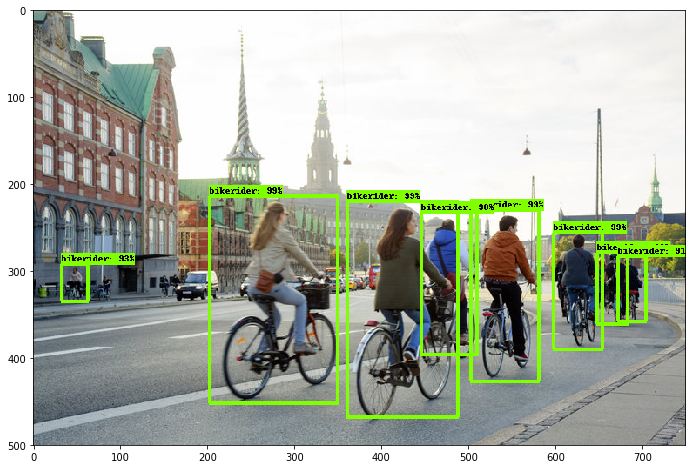

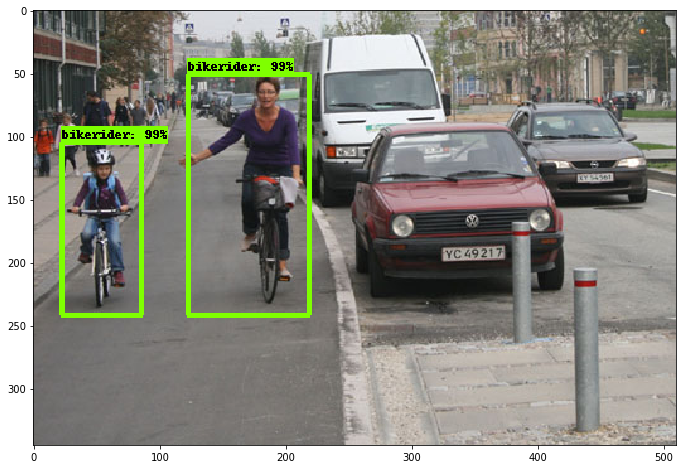

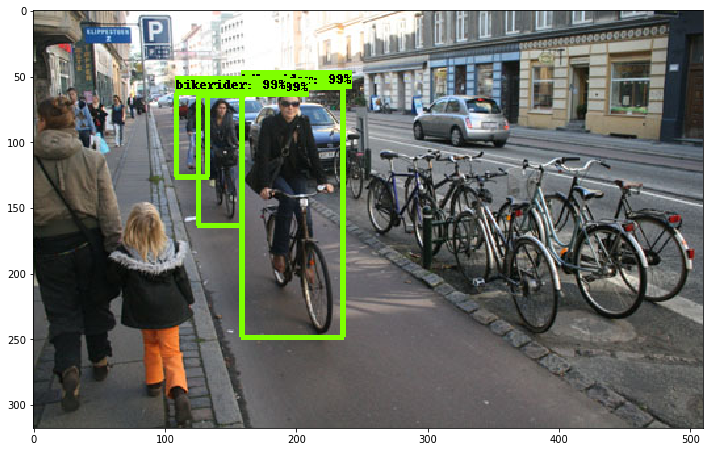

In [26]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=4)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)